Facebook Live Sellers

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Importing Dataset


In [10]:
df=pd.read_csv('Facebook_Marketplace_data.csv')


Q1. How does the time of upload (`status_published`)  affects the `num_reaction`?

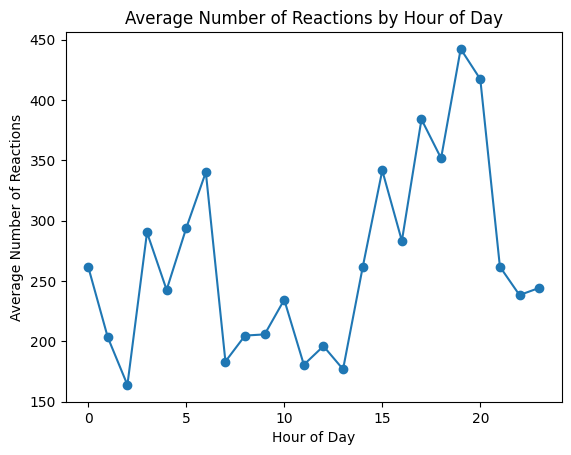

In [18]:
df['status_published']=pd.to_datetime(df['status_published'])

# Convert status_published to datetime objects in order to  do our analysis as it's present in different datatype
df['hour_published']=df['status_published'].dt.hour

# Extracting hour of the day from status_published for this question
hourly_reactions=df.groupby('hour_published')['num_reactions'].mean()

plt.plot(hourly_reactions.index, hourly_reactions.values, marker='o')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Reactions')
plt.title('Average Number of Reactions by Hour of Day')
plt.show()

Q2.Is there a correlation between the number of reactions (num_reactions) and other engagement metrics such as comments (num_comments) and shares (num_shares)? If so, what is the strength and direction of this correlation?

In [19]:
correlation_matrix=df[['num_reactions', 'num_comments', 'num_shares']].corr()
print(correlation_matrix)

# Values close to 1 → Strong positive correlation
# Values close to -1 → Strong negative correlation
# Values close to 0 → No correlation

               num_reactions  num_comments  num_shares
num_reactions       1.000000      0.150843    0.250723
num_comments        0.150843      1.000000    0.640637
num_shares          0.250723      0.640637    1.000000


Q3. Use columns status_type, num_reactions, num_comments, num_shares, num_likes, num_loves, num_wows, num_hahas, num_sads, and num_angrys to train a K-Means clustering model on the Facebook Live Sellers dataset.

In [32]:
X=df[['status_type', 'num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']]

ct=ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X=np.array(ct.fit_transform(X))

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

kmeans=KMeans(n_clusters=6, random_state=42)
y_kmeans=kmeans.fit_predict(X_scaled)

Q4. Use the elbow method to find the optimum number of clusters.

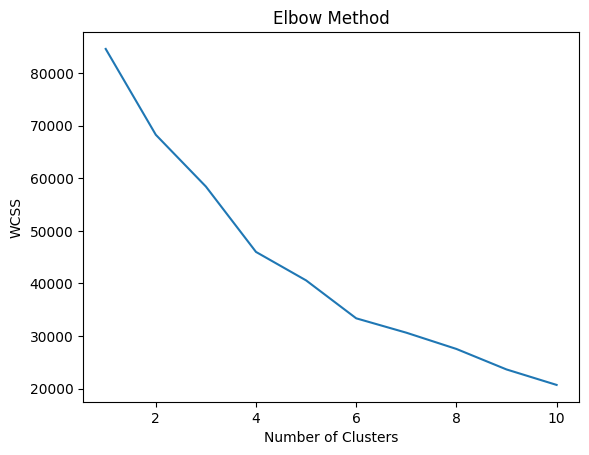

In [26]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Q5.	What is the count of different types of posts in the dataset?

In [33]:
print(df["status_type"].value_counts())

status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64


Q6.	What is the average value of num_reaction, num_comments, num_shares for each post type?

In [34]:
avg=df.groupby('status_type')[['num_reactions', 'num_comments', 'num_shares']].mean()
print(avg)

             num_reactions  num_comments  num_shares
status_type                                         
link            370.142857      5.698413    4.396825
photo           181.290345     15.993470    2.553871
status          438.783562     36.238356    2.558904
video           283.409597    642.478149  115.679949
